Loading... category: cats
Loaded category: cats successfully
Loading... category: dogs
Loaded category: dogs successfully
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] EN

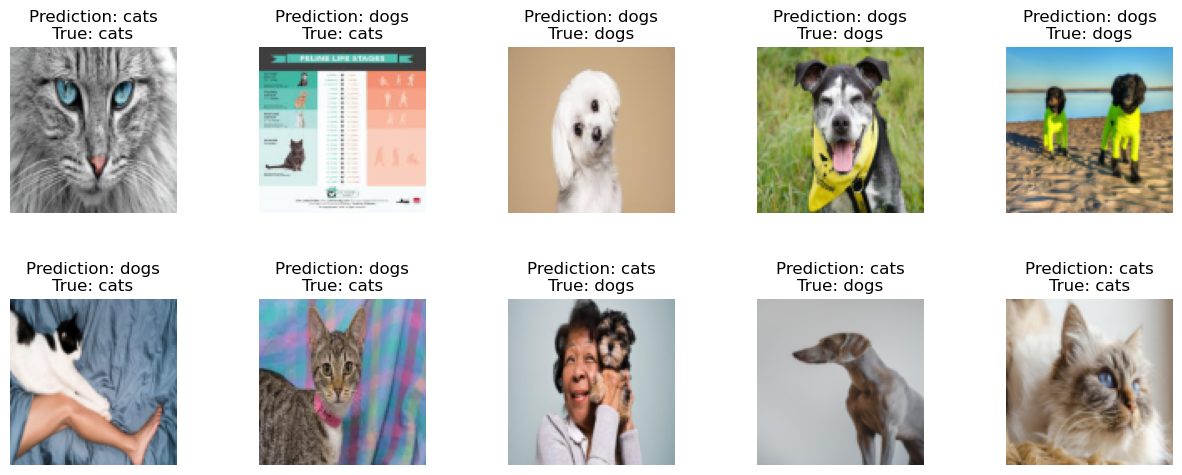

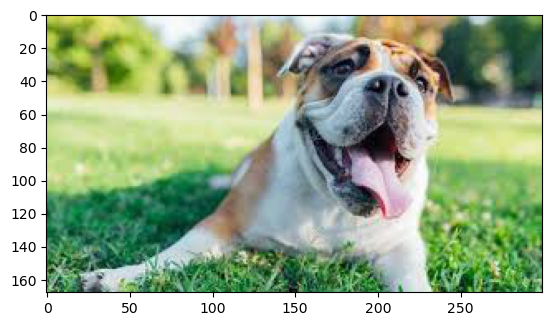

cats = 27.4277142324253%
dogs = 72.57228576757467%
The predicted image is : dogs


In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

categories = ['cats', 'dogs']
flat_data_arr = []  
target_arr = []   
dartadir = r'C:\ML COURSE\dataset'  

for i in categories:
    print(f"Loading... category: {i}")
    path = os.path.join(dartadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (100, 100, 3))
        flat_data_arr.append(img_resized.flatten())  
        target_arr.append(categories.index(i))
    print(f"Loaded category: {i} successfully")    

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(probability=True), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

predictions = grid.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions, target_names=categories)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(x_test[i].reshape(100, 100, 3))
    axes[i].set_title(f"Prediction: {categories[predictions[i]]}\nTrue: {categories[y_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

path = r"C:\Users\Ahmed Yasser\Downloads\33.jpg"
img = imread(path)
plt.imshow(img)
plt.show()

img_resize = resize(img, (100, 100, 3))  
l = [img_resize.flatten()]

probability = grid.predict_proba(l)
for ind, val in enumerate(categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : " + categories[grid.predict(l)[0]])
